# MSDS 422 - Module 1 Assignment 1
# Yue Yu
github: https://github.com/yy383124955/msds422/tree/main/Week%201
## Data overview

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set()

In [2]:
# Import data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# show head of training data
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# show head of test data
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Need to predict SalePrice

In [4]:
# check info of training data
df_train.info()
# check Summary statistics of training data
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing Data

In [5]:
# Find Missing Data
df_missing_data = df_train.isnull().sum().sort_values(ascending=False)
df_missing_data.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [6]:
# Top 6 have a lot of missing data in tarin Data, we can remove these columns from data
new_df_train=df_train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu','LotFrontage'])
print("Original number of columns ",len(df_train.columns))
print("Updated number of columns ",len(new_df_train.columns))

Original number of columns  81
Updated number of columns  75


## Visual exploration of categorical columns

In [7]:
# Pick some Categorical columns of train data 
categorical = ['MSSubClass','Neighborhood','Street']
df_categorical = new_df_train[categorical]

# Double check missing data
df_missing_data_3 = df_categorical.isnull().sum().sort_values(ascending=False)
df_missing_data_3.head(5)
# No missing values

MSSubClass      0
Neighborhood    0
Street          0
dtype: int64

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

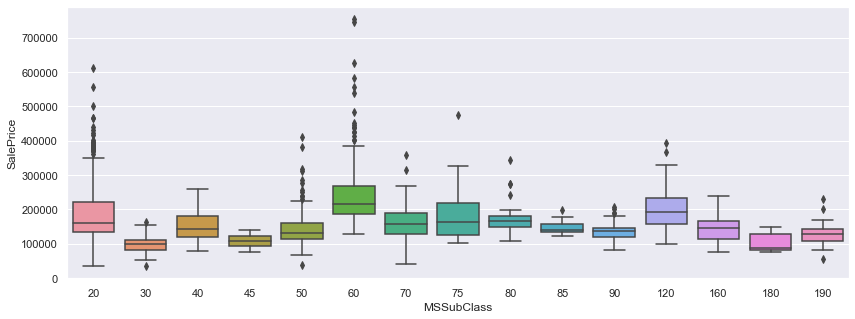

In [8]:
# Box plot of MSSubClass: Identifies the type of dwelling involved in the sale.
plt.figure(figsize=(14, 5))
sns.boxplot(y = df_train['SalePrice'], x = df_train['MSSubClass'])

MSSubClass is the first category in train data. As seen from the box chart, 60 (2-STORY 1946 & NEWER) is the only housing type whose average housing price is higher than 200,000. All other types of homes cost less than 200,000 on average. There are many outliers in both 20 (1-STORY 1946 & NEWER ALL STYLES) and 60, and the cause of the influence needs to be found from other aspects and removed if necessary. Reading from the chart alone, we can predict that type 60 houses are more likely to sell for a higher price than other types.

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

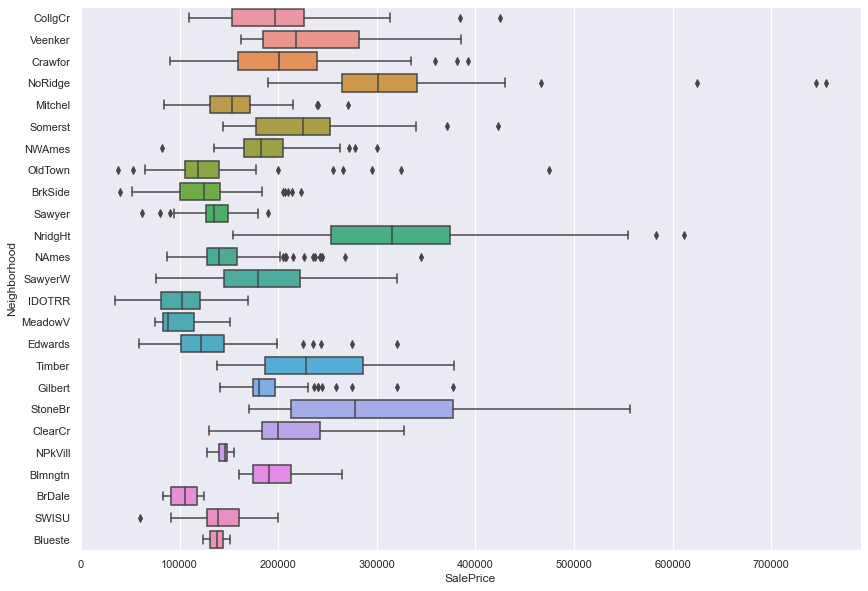

In [9]:
# Box plot of Neighborhood: Physical locations within Ames city limits
plt.figure(figsize=(14, 10))
sns.boxplot(x = df_train['SalePrice'], y = df_train['Neighborhood'])

As you can see, physical locations have a significant impact on the price of a house. Ignoring outliers, both NridgHt (Northridge Heights) and StoneBr (Stone Brook) sold at higher prices than in other areas. From this chart, I can predict that houses in NridgHt and StoneBr would have a larger share of total sales than the others and be priced higher overall.

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

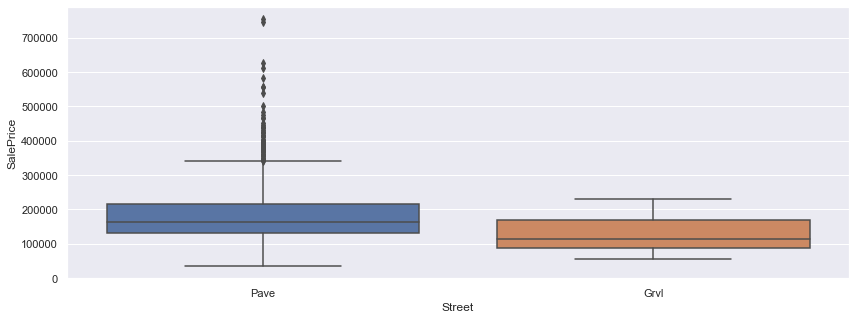

In [10]:
# Box plot of Condition1: Proximity to various conditions
plt.figure(figsize=(14, 5))
sns.boxplot(y = df_train['SalePrice'], x = df_train['Street'])

Choosing a label with only two elements, gravel street currently appears to have a clear price advantage, with many high outliers. My prediction is that properties with gravel streets will sell for more than paved properties.

## Find dependent variable from numerical columns

In [11]:
# Pick some numerical columns of train data 
numerical = ['LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd', 'TotRmsAbvGrd','GrLivArea', 'GarageCars','SalePrice']
df_numerical = new_df_train[numerical]

# Double check missing data
df_missing_data_2 = df_numerical.isnull().sum().sort_values(ascending=False)
df_missing_data_2.head(9)
# No missing values


LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotRmsAbvGrd    0
GrLivArea       0
GarageCars      0
SalePrice       0
dtype: int64

array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'GarageCars'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

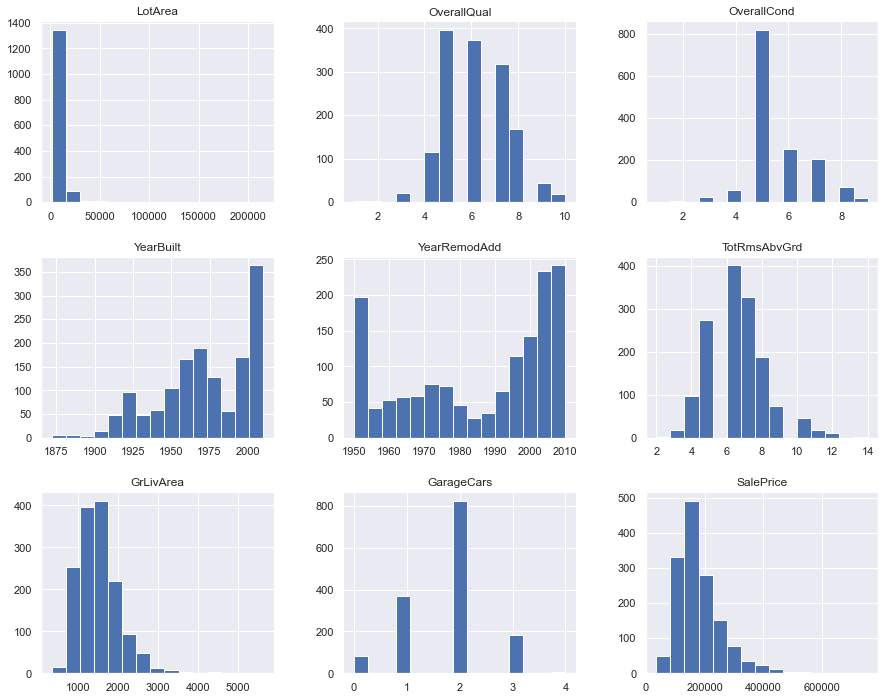

In [12]:
# Showing numerical in bar charts
df_numerical[numerical].hist(bins=15, figsize=(15, 12,), layout=(3, 3))


In [13]:
df_numerical_corr = df_numerical.corr()
df_numerical_corr

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotRmsAbvGrd,GrLivArea,GarageCars,SalePrice
LotArea,1.000000,0.105806,-0.005636,0.014228,0.013788,0.190015,0.263116,0.154871,0.263843
OverallQual,0.105806,1.000000,-0.091932,0.572323,0.550684,0.427452,0.593007,0.600671,0.790982
OverallCond,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.057583,-0.079686,-0.185758,-0.077856
YearBuilt,0.014228,0.572323,-0.375983,1.000000,0.592855,0.095589,0.199010,0.537850,0.522897
YearRemodAdd,0.013788,0.550684,0.073741,0.592855,1.000000,0.191740,0.287389,0.420622,0.507101
TotRmsAbvGrd,0.190015,0.427452,-0.057583,0.095589,0.191740,1.000000,0.825489,0.362289,0.533723
GrLivArea,0.263116,0.593007,-0.079686,0.199010,0.287389,0.825489,1.000000,0.467247,0.708624
GarageCars,0.154871,0.600671,-0.185758,0.537850,0.420622,0.362289,0.467247,1.000000,0.640409
SalePrice,0.263843,0.790982,-0.077856,0.522897,0.507101,0.533723,0.708624,0.640409,1.000000


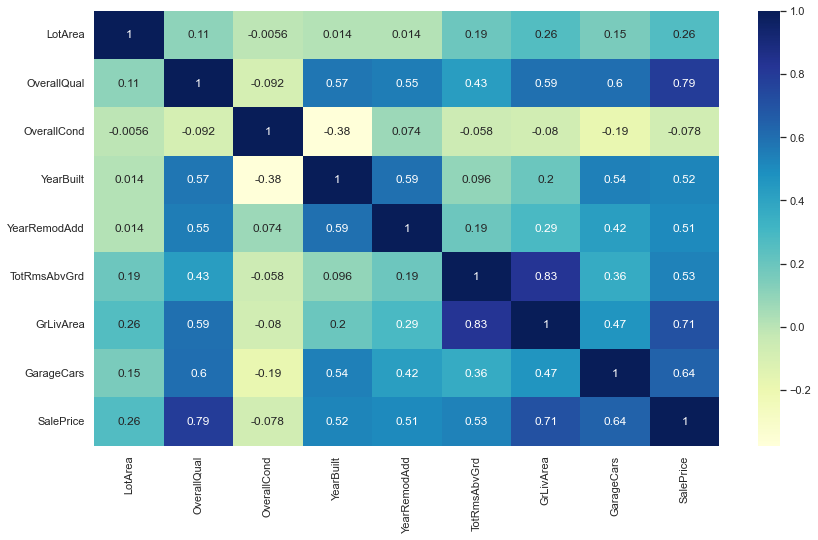

In [14]:
# Use heatmap to show the correction of numerical columnes to find the dependent variable
# plotting correlation heatmap
plt.figure(figsize=(14, 8))
dataplot = sns.heatmap(df_numerical_corr, cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In the nine numerical columns selected by me, OverallQual(0.79), GrLivArea(0.71), and GarageCars(0.64) corrections are higher than 0.6. The higher their absolute values, the more significant their impact on predictors as dependent variables.

## New predictor

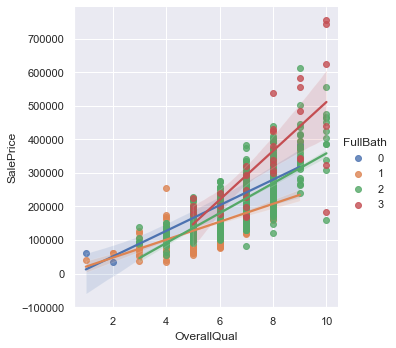

In [15]:
# OverallQual: Rates the overall material and finish of the house
# FullBath: Full bathrooms above grade
sns.lmplot(x='OverallQual', y='SalePrice',data=new_df_train,hue='FullBath')

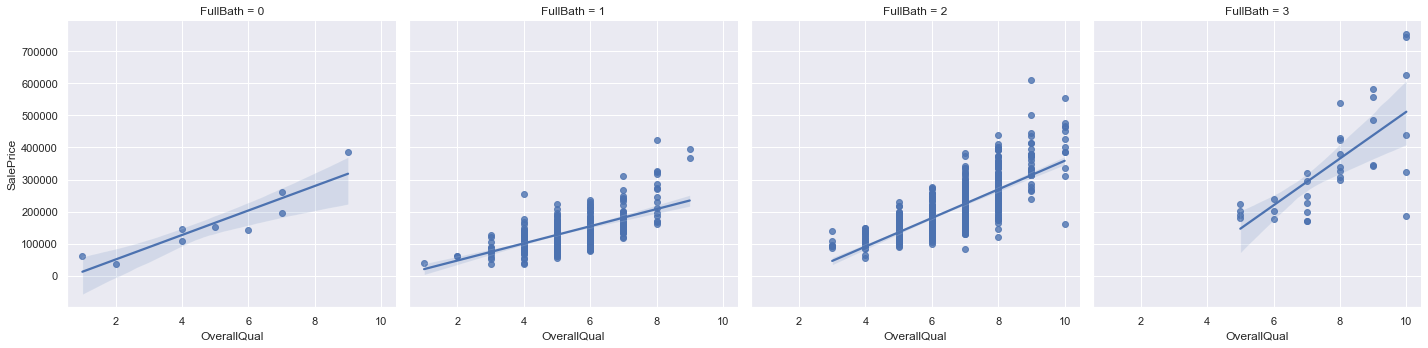

In [16]:
sns.lmplot(x='OverallQual', y='SalePrice', data=new_df_train, col='FullBath')

According to my previous correction, it is found that OverallQual has a significant influence on SalePrice, so I want to merge OverallQual and FullBath to produce a new predictor.

It can be seen from the comprehensive figure alone because we know an apparent linear relationship between OverallQual and SalePrice. The more toilets there are, the more significant the impact.

The situation of FullBath is shown in the four grids, respectively. The number of 0 FullBath in the sample is minimal, so the slope of the linear relationship is not much different from that of 1 FullBath. However, the distribution and selling price range of 1 FullBath and 2 FullBath in OverallQual are diverse. The slope of 2 FullBath is higher; there are more properties OverallQual and SalePrice are higher than 1 FullBath. 3 FullBath has a higher slope, and there are no properties sold below five and $100 million


### Min-Max Scaler / Standard Scaler

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df_train_scaler = new_df_train[['OverallQual', 'SalePrice', 'FullBath']].copy()
df_train_scaler


,OverallQual,SalePrice,FullBath
0,7,208500,2
1,6,181500,2
2,7,223500,2
3,7,140000,1
4,8,250000,2
...,...,...,...
1455,6,175000,2
1456,6,210000,2
1457,7,266500,2
1458,5,142125,1


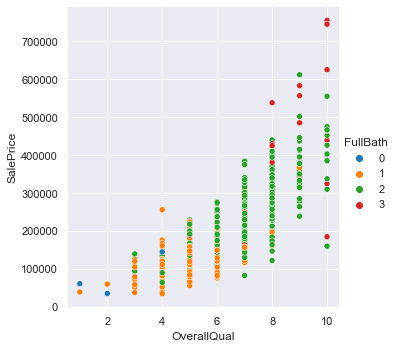

In [18]:
# Before run Min-Max / Standard Scaler
sns.relplot(data=df_train_scaler, x="OverallQual", y="SalePrice",hue="FullBath", palette='tab10')

In [19]:
# After run Min-Max Scaler
df_train_minmax = df_train_scaler
df_train_minmax[['OverallQual', 'SalePrice']] = min_max_scaler.fit_transform(df_train_minmax[['OverallQual', 'SalePrice']])
df_train_minmax

,OverallQual,SalePrice,FullBath
0,0.666667,0.241078,2
1,0.555556,0.203583,2
2,0.666667,0.261908,2
3,0.666667,0.145952,1
4,0.777778,0.298709,2
...,...,...,...
1455,0.555556,0.194556,2
1456,0.555556,0.243161,2
1457,0.666667,0.321622,2
1458,0.444444,0.148903,1


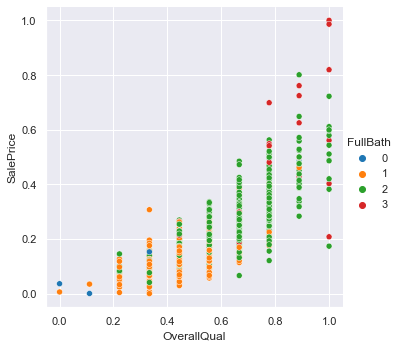

In [20]:
sns.relplot(data=df_train_minmax, x="OverallQual", y="SalePrice",hue="FullBath", palette='tab10')

The minimum value in each column of features becomes 0 and the maximum value becomes 1

In [21]:
# After run StandardScaler Scaler
df_train_standard = df_train_scaler
df_train_standard[['OverallQual', 'SalePrice']] = standard_scaler.fit_transform(df_train_standard [['OverallQual', 'SalePrice']])
df_train_standard 

,OverallQual,SalePrice,FullBath
0,0.651479,0.347273,2
1,-0.071836,0.007288,2
2,0.651479,0.536154,2
3,0.651479,-0.515281,1
4,1.374795,0.869843,2
...,...,...,...
1455,-0.071836,-0.074560,2
1456,-0.071836,0.366161,2
1457,0.651479,1.077611,2
1458,-0.795151,-0.488523,1


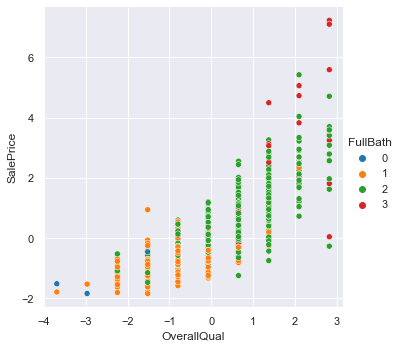

In [22]:
sns.relplot(data=df_train_standard, x="OverallQual", y="SalePrice",hue="FullBath", palette='tab10')

In most machine learning algorithms, StandardScaler is chosen for feature scaling because the MinMaxScaler is very sensitive to outliers